[[48  1]
 [ 2 92]]


C:\Users\varun\Anacond\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9976525821596244

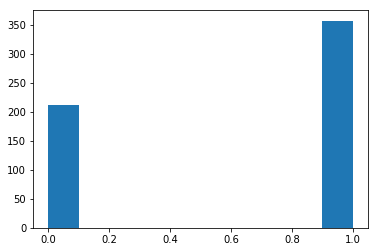

In [4]:
# %load MLPC.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wbcd = pd.read_csv("wbcd.csv")
wbcd.columns
wbcd.drop(["id"],axis=1,inplace=True) # Dropping the uncessary column
wbcd.isnull().sum() # No missing values 

wbcd.loc[wbcd.diagnosis=="B","diagnosis"] = 1
wbcd.loc[wbcd.diagnosis=="M","diagnosis"] = 0


X = wbcd.drop(["diagnosis"],axis=1)
Y = wbcd["diagnosis"]
plt.hist(Y)
wbcd.diagnosis.value_counts()



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30))

mlp.fit(X_train,y_train)
prediction_train=mlp.predict(X_train)
prediction_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_test))
np.mean(y_test==prediction_test)
np.mean(y_train==prediction_train)

